# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


df = pd.read_csv("universal_studio_branches.csv")
df['written_date'] = pd.to_datetime(df['written_date'])
df['Converted Date'] = df['written_date'].map(dt.datetime.toordinal)

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

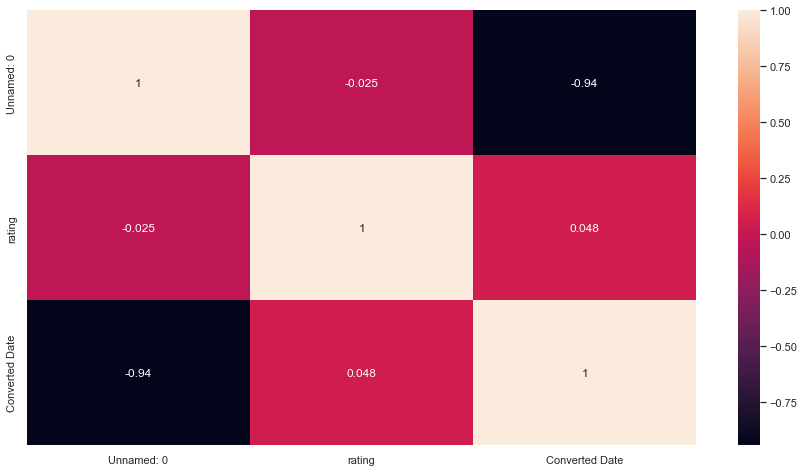

In [7]:
sb.set(rc = {'figure.figsize':(15,8)})
sb.heatmap(df.corr(),annot = True)




plt.show()

In [22]:
df.head()

,Unnamed: 0,reviewer,rating,written_date,title,review_text,branch,Converted Date
0,0,Kelly B,2.0,2021-05-30,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,737940
1,1,Jon,1.0,2021-05-30,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,737940
2,2,Nerdy P,2.0,2021-05-30,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,737940
3,3,ran101278,4.0,2021-05-29,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,737939
4,4,tammies20132015,5.0,2021-05-28,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,737938


## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [8]:
x = df['Converted Date']
y = df['rating']

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)
print(x_train)
print(y_train)


6706     736762
8607     736569
28685    734693
17046    735977
12173    736279
          ...  
12119    736283
24423    735464
14147    736160
23320    735560
5640     736863
Name: Converted Date, Length: 21434, dtype: int64
6706     5.0
8607     5.0
28685    4.0
17046    5.0
12173    5.0
        ... 
12119    4.0
24423    5.0
14147    5.0
23320    5.0
5640     4.0
Name: rating, Length: 21434, dtype: float64


In [14]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

lr.params


lr.summary()

C:\Users\Tori\DataAnalysis\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     47.86
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           4.71e-12
Time:                        19:14:50   Log-Likelihood:                -32302.
No. Observations:               21434   AIC:                         6.461e+04
Df Residuals:                   21432   BIC:                         6.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -39.3792      6.309     -6.241      0.000     -51.746     -27.013
Converted Date   5.93e-05   8.57e-06      6.918      0.000    4.25e-05    7.61e-05
==============================================================================
Omnibus:                     5581.129   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11491.267
Skew:                          -1.574   Prob(JB):                         0.00
Kurtosis:                       4.719   Cond. No.                     6.23e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

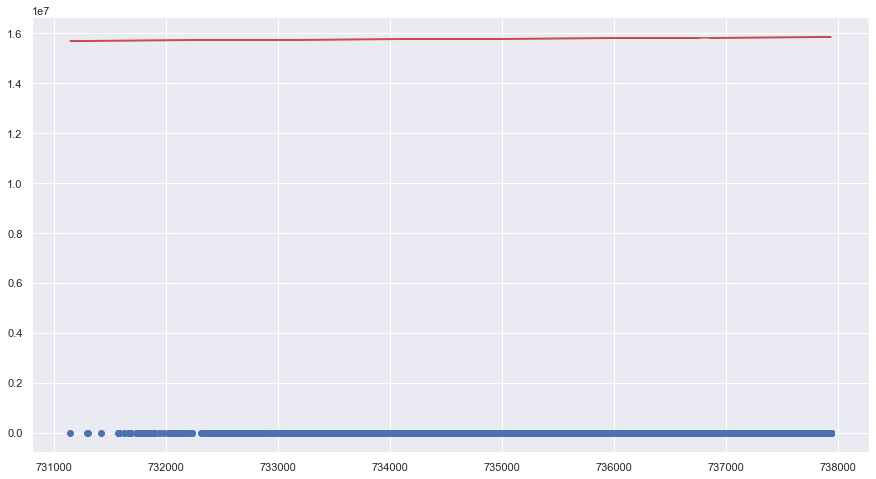

In [15]:
plt.scatter(x_train, y_train)
plt.plot(x_train, -43206.067012 + 21.509716*x_train, 'r')
plt.show()


## Error Terms

Finally, plot your error terms!

In [12]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

C:\Users\Tori\DataAnalysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


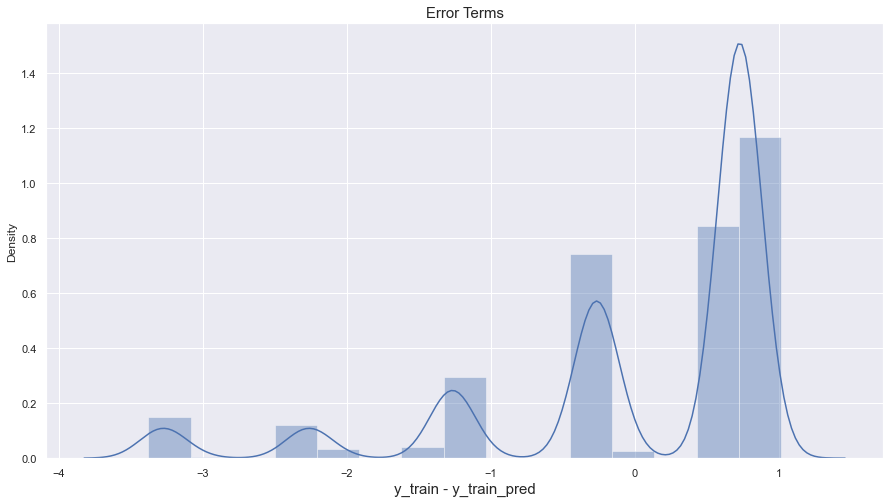

In [13]:
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.002
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was effective.
3. Was your plot of the error terms a bell curve? Not at all